In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
device = torch.device(type = 'cpu')
from sklearn.datasets import make_blobs

In [95]:
X, y = make_blobs(n_samples= 10000
                  ,n_features= 2, cluster_std= 1.25,centers=2)

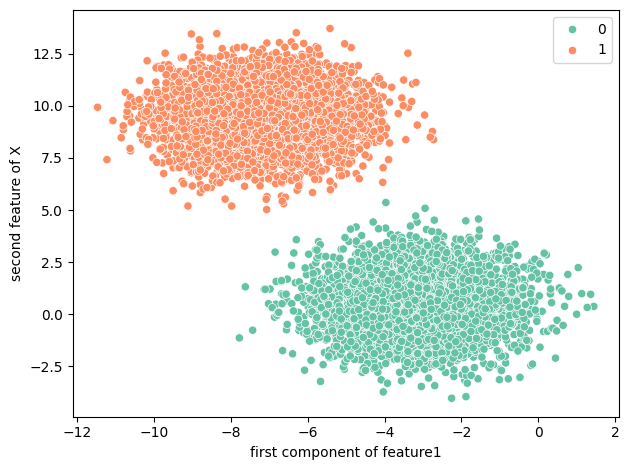

In [96]:
sns.scatterplot(x= X[:,0], y= X[:,1],
                hue= y, palette= 'Set2')
plt.xlabel('first component of feature1')
plt.ylabel('second feature of X')
plt.tight_layout()

In [82]:
print('shape of the input features: ', X.shape)
print('shape of the target label is: ', y.shape)

shape of the input features:  (10000, 2)
shape of the target label is:  (10000,)


In [97]:
#convert to tensor --> create the training and testing set
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#using the train test split for the training and the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print('shape of the training set: ', (X_train.shape,y_train.shape))
print('shape of the testing set: ', (X_test.shape, y_test.shape))


shape of the training set:  (torch.Size([8000, 2]), torch.Size([8000]))
shape of the testing set:  (torch.Size([2000, 2]), torch.Size([2000]))


In [98]:
#creating the model
class model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features= 2, out_features= 4)
        self.layer2 = nn.Linear(in_features=4, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoidal = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoidal(self.layer2(self.relu(self.layer1(x))))

model = model0().to(device= device)
model

model0(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoidal): Sigmoid()
)

In [99]:
#defining the optimizer the loss function and the accuracy function
loss_fun = nn.BCELoss()

optimizer = torch.optim.Adam(params= model.parameters(), lr= 0.005, weight_decay= 0.001)

def acc_fun(true, pred):
    correct = torch.eq(true, pred).sum().item()
    acc = (correct / len(true)) * 100
    return acc

In [100]:
X_train, y_train = X_train.to(device), y_train.reshape(y_train.shape[0],1).to(device)
X_test, y_test = X_test.to(device), y_test.reshape(y_test.shape[0],1).to(device)

# training the model
epochs = 500
train_loss_epoch = []
test_loss_epoch = []
train_acc_epoch = []
test_acc_epoch = []
epoch_count = []

for i in range(epochs):
    epoch_count.append(i)
    model.train()

    #forward pass
    y_pred = model(X_train)

    #predicting the label
    y_label = torch.round(y_pred)

    #Loss function
    loss = loss_fun(y_pred, y_train)

    #calculating the train accuracy
    acc = acc_fun(true = y_train, pred= y_label)
    train_acc_epoch.append(acc)

    #doing the backprop
    optimizer.zero_grad()

    #backpropogation
    loss.backward()

    #update the weights
    optimizer.step()

    #model in evaluation
    model.eval()
    train_loss_epoch.append(loss.item())

    #put the model into the evaluation mode
    with torch.inference_mode():
        test_prob = model(X_test)
        test_label = torch.round(test_prob)
        test_loss = loss_fun(test_prob, y_test)
        test_acc = acc_fun(true= y_test, pred= test_label)
        test_loss_epoch.append(test_loss.item())
        test_acc_epoch.append(test_acc)
    
    print(f'epoch: {i} | train_loss : {loss:.5f} | test_loss : {test_loss:.5f} | train_acc : {acc:.4f}% | test_acc : {test_acc:.4f}%')
    


epoch: 0 | train_loss : 0.54229 | test_loss : 0.54412 | train_acc : 50.2125% | test_acc : 49.1500%
epoch: 1 | train_loss : 0.53791 | test_loss : 0.53980 | train_acc : 50.2125% | test_acc : 49.1500%
epoch: 2 | train_loss : 0.53359 | test_loss : 0.53556 | train_acc : 50.2125% | test_acc : 49.1500%
epoch: 3 | train_loss : 0.52934 | test_loss : 0.53138 | train_acc : 50.2125% | test_acc : 49.1500%
epoch: 4 | train_loss : 0.52515 | test_loss : 0.52725 | train_acc : 50.2125% | test_acc : 49.1500%
epoch: 5 | train_loss : 0.52102 | test_loss : 0.52318 | train_acc : 50.2125% | test_acc : 49.1500%
epoch: 6 | train_loss : 0.51695 | test_loss : 0.51916 | train_acc : 50.2125% | test_acc : 49.2500%
epoch: 7 | train_loss : 0.51294 | test_loss : 0.51519 | train_acc : 50.3375% | test_acc : 51.7500%
epoch: 8 | train_loss : 0.50897 | test_loss : 0.51126 | train_acc : 53.1750% | test_acc : 53.7000%
epoch: 9 | train_loss : 0.50505 | test_loss : 0.50736 | train_acc : 54.8625% | test_acc : 54.8500%
epoch: 10 

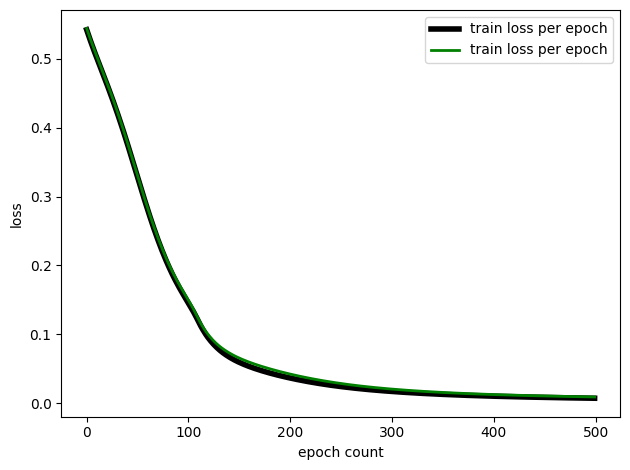

In [101]:
plt.plot(epoch_count, train_loss_epoch, color = 'k', linewidth = 4, label = 'train loss per epoch')
plt.plot(epoch_count, test_loss_epoch, color = 'g', linewidth = 2, label = 'train loss per epoch')
plt.xlabel('epoch count')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()

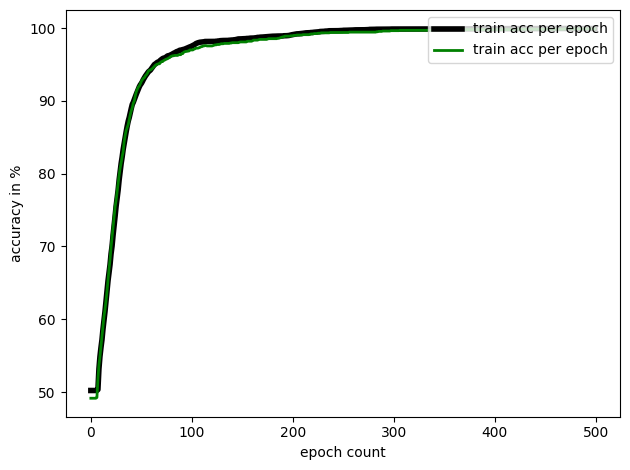

In [102]:
plt.plot(epoch_count, train_acc_epoch, color = 'k', linewidth = 4, label = 'train acc per epoch')
plt.plot(epoch_count, test_acc_epoch, color = 'g', linewidth = 2, label = 'train acc per epoch')
plt.xlabel('epoch count')
plt.ylabel('accuracy in %')
plt.legend(loc = 'upper right')
plt.tight_layout()